# ANGSTER NOTEBOOK CODE
## Data Preperation and Visualization
This source code imports the CDC dataset and filters the necessary
data that is used to make the data visualizations. All graphics are
saved in svg. format in a directory accessible by our python server
and displayed on the frontend HTML site by request.

Team Members: Jiwoo Lee, Johnny Turner, Michaud Reyna, Chidinma Chinedu, JerNettie Burney, Josh Kissel

Link to the CDC dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp\

In [2]:
#import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.widgets import Slider
from matplotlib.pyplot import figure
from urllib.request import urlopen
import json
import plotly.express as px
from pandas import DataFrame
import plotly.graph_objects as go
import random
import chart_studio.plotly
from plotly.offline import iplot
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"

In [3]:
#import the dataset
df = pd.read_csv('/home/michaud_reyna/covid19MH.csv')

#display original dataset as a pandas dataframe (first 5 rows)
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [4]:
#display different Indicators
uniqueRows = df['Indicator'].drop_duplicates()
print(uniqueRows)

0                        Symptoms of Depressive Disorder
70                          Symptoms of Anxiety Disorder
140    Symptoms of Anxiety Disorder or Depressive Dis...
Name: Indicator, dtype: object


In [5]:
#create separate dataframes for each Indicator
isDepressive = df['Indicator'] == "Symptoms of Depressive Disorder"
isAnxiety = df['Indicator'] == "Symptoms of Anxiety Disorder"
isBoth = df['Indicator'] == "Symptoms of Anxiety Disorder or Depressive Disorder"

depressiveDF = df[isDepressive] 
anxietyDF = df[isAnxiety]
bothDF = df[isBoth]

#create National Estimate dataframes for each Indicator
DepressiveNE = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Depressive Disorder')]
AnxietyNE = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder')]
BothNE = df[(df['Group'] == 'National Estimate') & (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]

In [6]:
#display the first 5 rows of National Estimate for one of the Indicators

DepressiveNE.head()
#Anxiety.NEhead()
#BothNE.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
210,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,2,May 7 - May 12,05/07/2020,05/12/2020,24.1,23.0,25.2,23.0 - 25.2,NaN
420,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,3,May 14 - May 19,05/14/2020,05/19/2020,24.4,23.7,25.2,23.7 - 25.2,NaN
630,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,4,May 21 - May 26,05/21/2020,05/26/2020,24.9,24.1,25.7,24.1 - 25.7,NaN
840,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,5,May 28 - June 2,05/28/2020,06/02/2020,25.3,24.7,25.8,24.7 - 25.8,NaN


# Creating Line Graph Visualizations
- National Estimate of Symptoms Over Time
- National Estimate of Depression Over Time
- National Estimate of Anxiety Over Time
- National Estimate of Both Anxiety and Depression Over Time

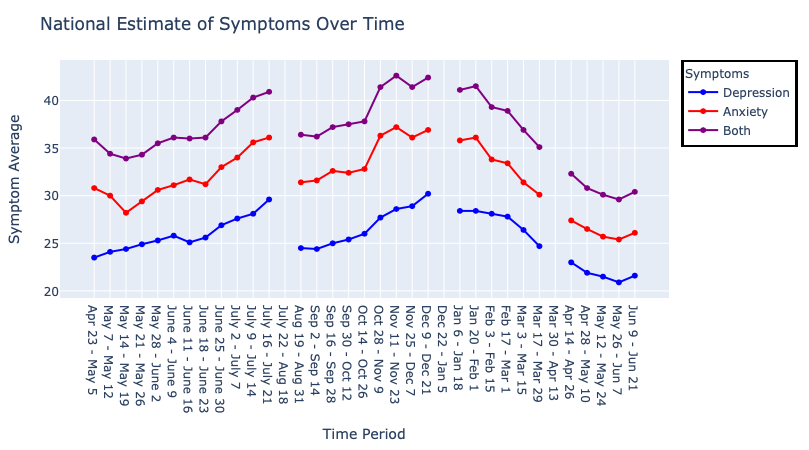

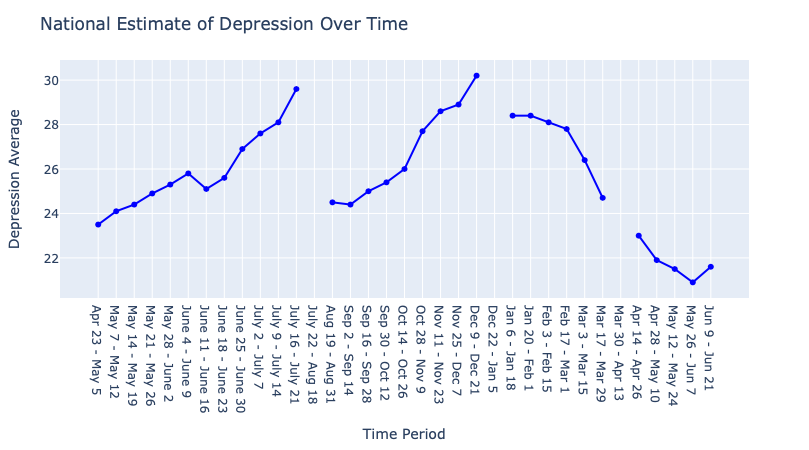

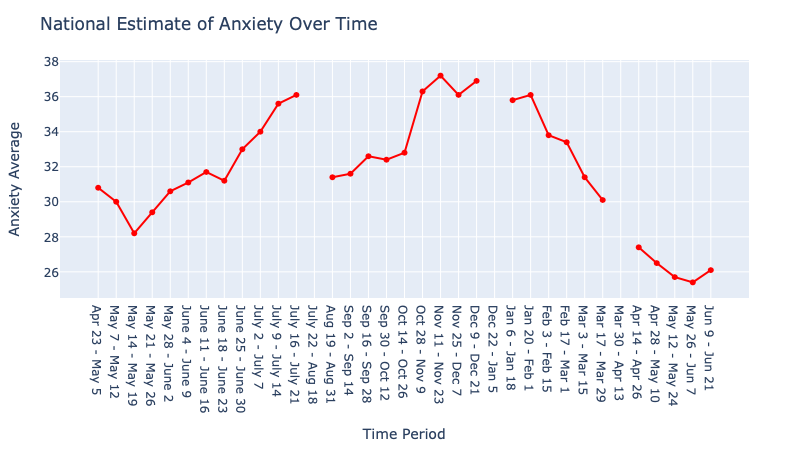

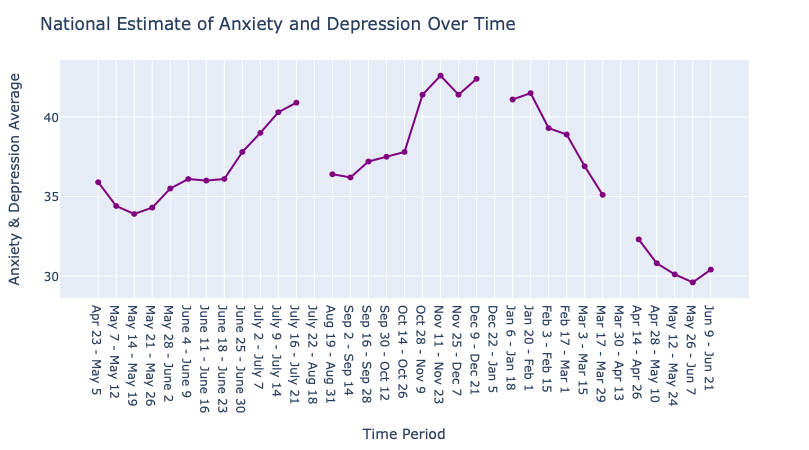

In [9]:
#Create Line Graph for National Estimate of Symptoms Over Time

fig = go.Figure()
fig.add_trace(go.Scatter(x = DepressiveNE['Time Period Label'], y = DepressiveNE['Value'],
                        mode = 'lines+markers',
                        name = 'Depression',
                        line = dict(color = 'blue', width = 2)))
fig.add_trace(go.Scatter(x = AnxietyNE['Time Period Label'], y = AnxietyNE['Value'],
                        mode = 'lines+markers',
                        name = 'Anxiety',
                        line = dict(color = 'red', width = 2)))
fig.add_trace(go.Scatter(x = BothNE['Time Period Label'], y = BothNE['Value'],
                        mode = 'lines+markers',
                        name = 'Both',
                        line = dict(color = 'purple', width = 2)))

fig.update_layout(title = 'National Estimate of Symptoms Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Symptom Average',
                  legend_title_text = 'Symptoms',
                  margin = dict(l = 60, r = 60, t = 60, b = 60),
                  paper_bgcolor = "white",
                 legend = dict(bgcolor = "light grey",
                              bordercolor = "black",
                              borderwidth = 2))
fig.update_yaxes(automargin = True)

#fig.write_image('national_estimate_allsypmtoms_line.svg')
fig.write_html('national_estimate_allysmptoms_line.html', full_html=False)
fig.show()


#Create Line Graph for National Average of Depression Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x = DepressiveNE['Time Period Label'], y = DepressiveNE['Value'],
                        mode = 'lines+markers',
                        name = 'Depression',
                        line = dict(color = 'blue', width = 2)))
fig.update_layout(title = 'National Estimate of Depression Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Depression Average',
                  margin = dict(l = 60, r = 60, t = 60, b = 60),
                  paper_bgcolor = "white")

#fig.write_image('national_estimate_depression_line.svg')
fig.write_html('national_estimate_depression_line.html', full_html=False)
fig.show()


#Create Line Graph for National Average of Anxiety Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x = AnxietyNE['Time Period Label'], y = AnxietyNE['Value'],
                        mode = 'lines+markers',
                        name = 'Anxiety',
                        line = dict(color = 'red', width = 2)))
fig.update_layout(title = 'National Estimate of Anxiety Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Anxiety Average',
                  margin = dict(l = 60, r = 60, t = 60, b = 60),
                  paper_bgcolor = "white")


#fig.write_image('national_estimate_anxiety_line.svg')
fig.write_html('national_estimate_anxiety_line.html', full_html=False)
fig.show()


#Create Line Graph for National Average of Both Anixety and Depression Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x = BothNE['Time Period Label'], y = BothNE['Value'],
                        mode = 'lines+markers',
                        name = 'Both',
                        line = dict(color = 'purple', width = 2)))
fig.update_layout(title = 'National Estimate of Anxiety and Depression Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Anxiety & Depression Average',
                  margin = dict(l = 60, r = 60, t = 60, b = 60),
                  paper_bgcolor = "white")

#fig.write_image('national_estimate_both_line.svg')
fig.write_html('national_estimate_both_line.html', full_html=False)
fig.show()

# Age By Symptom Code
Creating Age/Symptom Data Frames & Visualizations

- National Depression Estimate by Age
- National Anxiety Estimate by Age
- National Anxiety and Depression Estimate by Age

You can click on a specific age groups and it will filter out

In [10]:
#Creating the data frames for the Age by separate Indicator

ageDF = depressiveDF[(depressiveDF['Group'] == 'By Age')] #depression by age
ageAF = anxietyDF[(anxietyDF['Group'] == 'By Age')]       #anxiety by age
ageBF = bothDF[(bothDF['Group'] == 'By Age')]             #both by age

#display the first five rows of one of the data frames

#ageDf.head()
#ageAF.head()
ageBF.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
141,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,46.8,44.3,49.3,44.3 - 49.3,NaN
142,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,39.6,37.7,41.5,37.7 - 41.5,NaN
143,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,38.9,37.2,40.7,37.2 - 40.7,NaN
144,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,35.8,34.0,37.7,34.0 - 37.7,NaN
145,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,28.9,27.6,30.3,27.6 - 30.3,NaN


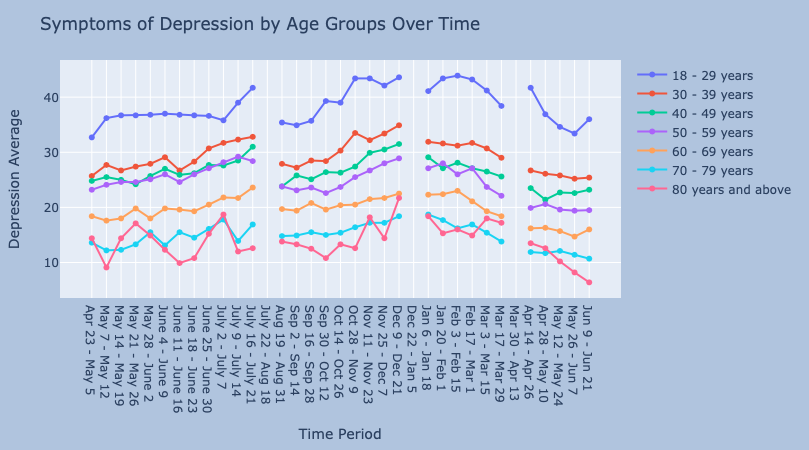

In [11]:
#Creating for loop to go through each Age subgroup each time period
#Depression by Age


fig = go.Figure()
for i in ageDF['Subgroup'].drop_duplicates():
    tempDF = ageDF['Subgroup'] == i                   
    tempdataDF=ageDF[tempDF]                                 #pulled age group name for each iteration in line above
    tempName = str(tempdataDF['Subgroup'])                   #names 790+ characters long so I trimmed them
    tempName = tempName[1:-778]                              
    tempName = tempName.strip()                              
    if len(tempName) > 13:                                   #one name is 965 characters so it needs extra trimming
        tempName = tempName[:-167]
    fig.add_trace(go.Scatter(x = tempdataDF['Time Period Label'], y = tempdataDF['Value'],
                            mode = 'lines+markers',
                            name = tempName))
                  
                                                             #create each line 

            
#format the layout of the table
fig.update_layout(title = 'Symptoms of Depression by Age Groups Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Depression Average', 
                  margin = dict(l = 60, r = 60, t = 60, b = 60), 
                  showlegend = True,
                 paper_bgcolor = "lightsteelblue")                
fig.update_yaxes(automargin = True)

#save and display figure
#fig.write_image('national_estimate_age_depression.svg')
fig.write_html('national_estimate_age_depression.html', full_html=False)
fig.show()

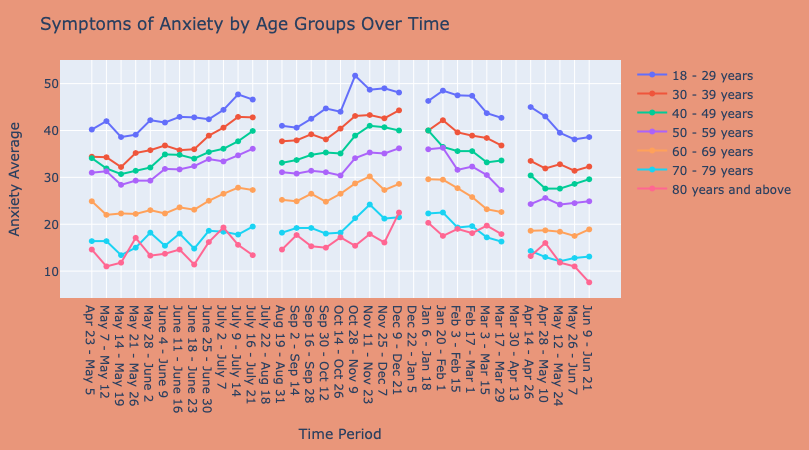

In [12]:
#Anxiety by Age


fig = go.Figure()
for i in ageAF['Subgroup'].drop_duplicates():
    tempAF = ageAF['Subgroup'] == i                   
    tempdataAF=ageAF[tempAF]                                 #pulled age group name for each iteration in line above
    tempName = str(tempdataAF['Subgroup'])                   #names 790+ characters long so I trimmed them
    tempName = tempName[2:22]                              
    tempName = tempName.strip()                              
    if len(tempName) > 13:                                #because I trimmed this one from the front, I had to add "bove"
        tempName = tempName + "bove"                      #so the final label would be 80 years and above #HARDCODED LOL
    fig.add_trace(go.Scatter(x = tempdataAF['Time Period Label'], y = tempdataAF['Value'],
                            mode = 'lines+markers',
                            name = tempName))
                  
                                                             #create each line 

            
#format the layout of the table
fig.update_layout(title = 'Symptoms of Anxiety by Age Groups Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Anxiety Average', 
                  margin = dict(l = 60, r = 60, t = 60, b = 60), 
                  showlegend = True,
                 paper_bgcolor = "darksalmon")                
fig.update_yaxes(automargin = True)

#save and display figure
#fig.write_image('national_estimate_age_anxiety.svg')
fig.write_html('national_estimate_age_anxiety.html', full_html=False)
fig.show()

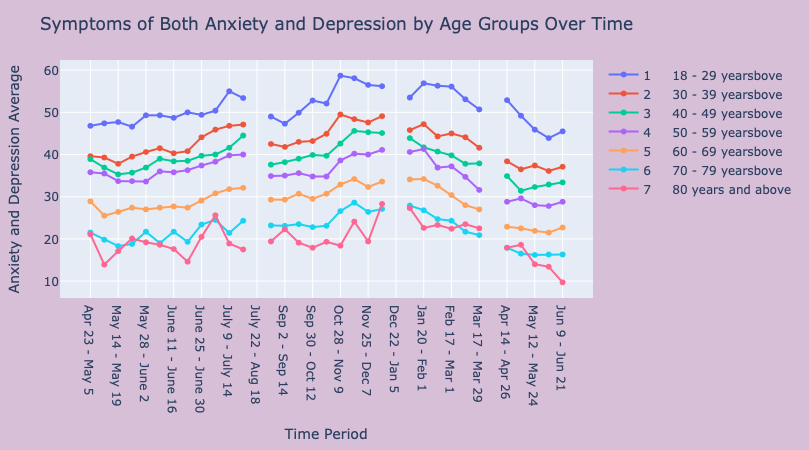

In [13]:
#Anxiety and Depression By Age


fig = go.Figure()
for i in ageBF['Subgroup'].drop_duplicates():
    tempBF = ageBF['Subgroup'] == i                   
    tempdataBF=ageBF[tempBF]                                 #pulled age group name for each iteration in line above
    tempName = str(tempdataBF['Subgroup'])                   #names 790+ characters long so I trimmed them
    tempName = tempName[2:22]                              
    tempName = tempName.strip()                              
    if len(tempName) > 13:                                #because I trimmed this one from the front, I had to add "bove"
        tempName = tempName + "bove"                      #so the final label would be 80 years and above #HARDCODED LOL
    fig.add_trace(go.Scatter(x = tempdataBF['Time Period Label'], y = tempdataBF['Value'],
                            mode = 'lines+markers',
                            name = tempName))
                  
                                                             #create each line 

            
#format the layout of the table
fig.update_layout(title = 'Symptoms of Both Anxiety and Depression by Age Groups Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Anxiety and Depression Average', 
                  margin = dict(l = 60, r = 60, t = 60, b = 60), 
                  showlegend = True,
                 paper_bgcolor = "thistle")                
fig.update_yaxes(automargin = True)

#save and display figure
#fig.write_image('national_estimate_age_both.svg')
fig.write_html('national_estimate_age_both.html', full_html=False)
fig.show()

# By Sex
Disclaimer: dataset only representative of cisgender identities <br/>
Creating Sex/Symptoms Data Frames and Visualizations

- Depression by Sex
- Anxiety by Sex 
- Both Anxiety and Depression by Sex

In [14]:
#Creating the data frames for the Age by separate Indicator

#Creating the data frames for Male and Female
maleDF = depressiveDF[(depressiveDF['Subgroup'] == 'Male')]         #male depression data frame
maleAF = anxietyDF[(anxietyDF['Subgroup'] == 'Male')]               #male anxiety data frame
maleBF = bothDF[(bothDF['Subgroup'] == 'Male')]                     #male anxiety & depression data frame

FmaleDF = depressiveDF[(depressiveDF['Subgroup'] == 'Female')]      #female depression data frame
FmaleAF = anxietyDF[(anxietyDF['Subgroup'] == 'Female')]            #female anxiety data frame
FmaleBF = bothDF[(bothDF['Subgroup'] == 'Female')]                  #female anxiety & depression data frame

#display the first five rows of one of the data frames

#maleDF.head()
#maleAF.head()
#maleBF.head()
#FmaleDF.head()
#FmaleAF.head()
FmaleBF.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
149,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Female,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,40.7,39.7,41.6,39.7 - 41.6,NaN
359,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Female,1,2,May 7 - May 12,05/07/2020,05/12/2020,37.2,36.2,38.3,36.2 - 38.3,NaN
569,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Female,1,3,May 14 - May 19,05/14/2020,05/19/2020,37.6,36.5,38.7,36.5 - 38.7,NaN
779,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Female,1,4,May 21 - May 26,05/21/2020,05/26/2020,38.1,37.0,39.2,37.0 - 39.2,NaN
989,Symptoms of Anxiety Disorder or Depressive Dis...,By Sex,United States,Female,1,5,May 28 - June 2,05/28/2020,06/02/2020,39.6,38.9,40.3,38.9 - 40.3,NaN


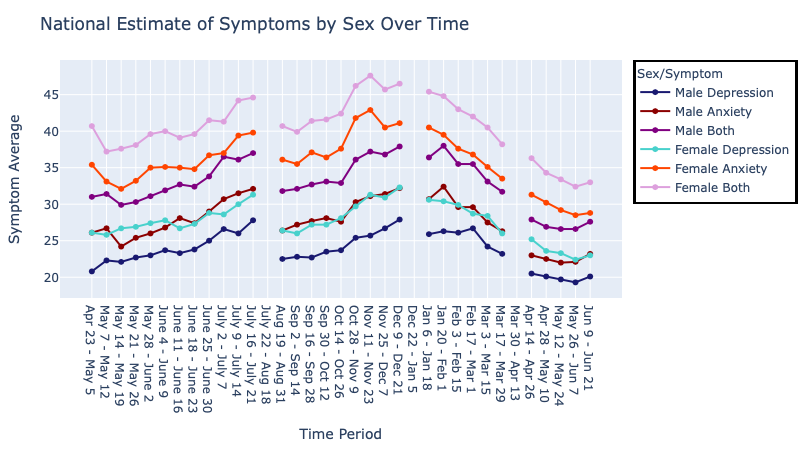

In [15]:
#Creating for loop to go through each Sex subgroup each time period
#Depression by Sex


fig = go.Figure()
fig.add_trace(go.Scatter(x = maleDF['Time Period Label'], y = maleDF['Value'],
                        mode = 'lines+markers',
                        name = 'Male Depression',
                        line = dict(color = 'midnightblue', width = 2)))
fig.add_trace(go.Scatter(x = maleAF['Time Period Label'], y = maleAF['Value'],
                        mode = 'lines+markers',
                        name = 'Male Anxiety',
                        line = dict(color = 'darkred', width = 2)))
fig.add_trace(go.Scatter(x = maleBF['Time Period Label'], y = maleBF['Value'],
                        mode = 'lines+markers',
                        name = 'Male Both',
                        line = dict(color = 'purple', width = 2)))
fig.add_trace(go.Scatter(x = FmaleDF['Time Period Label'], y = FmaleDF['Value'],
                        mode = 'lines+markers',
                        name = 'Female Depression',
                        line = dict(color = 'mediumturquoise', width = 2)))
fig.add_trace(go.Scatter(x = FmaleAF['Time Period Label'], y = FmaleAF['Value'],
                        mode = 'lines+markers',
                        name = 'Female Anxiety',
                        line = dict(color = 'orangered', width = 2)))
fig.add_trace(go.Scatter(x = FmaleBF['Time Period Label'], y = FmaleBF['Value'],
                        mode = 'lines+markers',
                        name = 'Female Both',
                        line = dict(color = 'plum', width = 2)))

fig.update_layout(title = 'National Estimate of Symptoms by Sex Over Time',
                 xaxis_title = 'Time Period',
                 yaxis_title = 'Symptom Average',
                  legend_title_text = 'Sex/Symptom',
                  margin = dict(l = 60, r = 60, t = 60, b = 60),
                  paper_bgcolor = "white",
                 legend = dict(bgcolor = "light grey",
                              bordercolor = "black",
                              borderwidth = 2))
fig.update_yaxes(automargin = True)


#save and display figure
#fig.write_image('national_estimate_sex_allsymptoms.svg')
fig.write_html('national_estimate_sex_allsymptoms.html', full_html = False)
fig.show()

# Symptoms by State
## Geographic Chart

- United States Depression Geographic
- United States Anxiety Geographic
- United States Anixety and Depression Geographic

*each graph will use a slider to change the time period and update the graph


In [16]:
#Create a list for the state abbreviations to match with the geolocations on the map
abbrev = [ 'AL',
            'AK',
            'AZ',
            'AR',
            'CA',
            'CO',
            'CT',
            'DE',
            'DC',
            'FL',
            'GA',
            'HI',
            'ID',
            'IL',
            'IN',
            'IA',
            'KS',
            'KY',
            'LA',
            'ME',
            'MD',
            'MA',
            'MI',
            'MN',
            'MS',
            'MO',
            'MT',
            'NE',
            'NV',
            'NH',
            'NJ',
            'NM',
            'NY',
            'NC',
            'ND',
            'OH',
            'OK',
            'OR',
            'PA',
            'RI',
            'SC',
            'SD',
            'TN',
            'TX',
            'UT',
            'VT',
            'VA',
            'WA',
            'WV',
            'WI',
            'WY'  ]
AB = DataFrame(abbrev, columns=['State'])

In [17]:
#Creating data frames for Symptoms by State
stateDF = depressiveDF[(depressiveDF['Group']=='By State')]
stateAF = anxietyDF[(anxietyDF['Group']=='By State')]
stateBF = bothDF[(bothDF['Group']=='By State')]

#display the first 5 rows of the data frames
#stateDF.head()
#stateAF.head()
stateBF.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
159,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alabama,Alabama,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,30.3,24.8,36.2,24.8 - 36.2,25.6 - 33.3
160,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alaska,Alaska,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,31.5,28.8,34.4,28.8 - 34.4,25.6 - 33.3
161,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Arizona,Arizona,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,36.4,32.3,40.7,32.3 - 40.7,34.8 - 36.7
162,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Arkansas,Arkansas,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,38.0,33.1,43.1,33.1 - 43.1,36.8 - 41.4
163,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,37.4,34.2,40.6,34.2 - 40.6,36.8 - 41.4


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



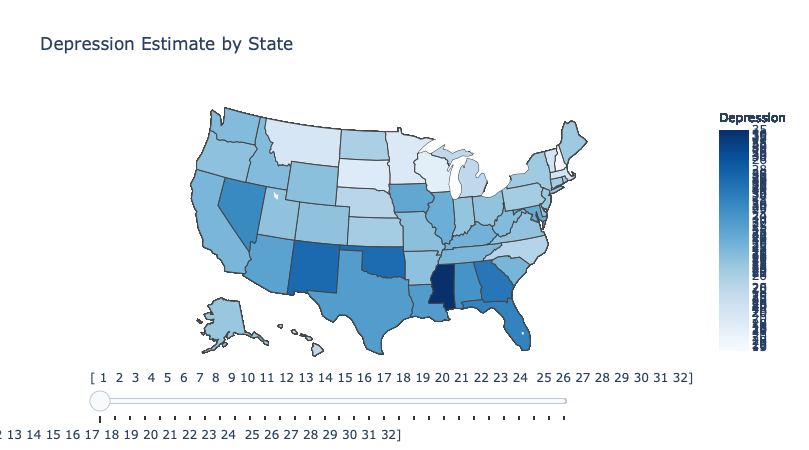

In [20]:
#Creating Choropleth Map for Depression by State

data_slider = []
for i in stateDF['Time Period Label'].unique():
    df_segmented = stateDF[stateDF['Time Period Label'] == i]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)
    
    tempName = str(df_segmented['Time Period Label'])
    tempName = tempName[4:-1089]
    tempName = tempName.strip()
    tempName = tempName.replace(" ", "")
    
    data_each_period = dict(type = 'choropleth',
                           locations = AB['State'],
                           z = df_segmented['Value'].astype(float),
                           locationmode = 'USA-states',
                           colorscale = 'blues',
                           colorbar = {'title':'Depression'},
                           name = tempName)
    
    
    data_slider.append(data_each_period)

steps = []
for i in range(len(data_slider)):
    step = dict(method = 'restyle',
               args = ['visible', [False] * len(data_slider)],
               label = str(stateDF['Time Period'].unique()))
    step['args'][1][i] = True,
    steps.append(step)
sliders = [dict(active = 0, pad = {"t": 5, "l": 10}, steps = steps, xanchor = 'left', len=0.8,
               visible = True)]

layout = dict(title = "Depression Estimate by State",
              geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
                        sliders=sliders)
               

fig = dict(data = data_slider, layout = layout)

#save and display

#pio.write_image(fig, 'depression_map.svg', format='svg')
pio.write_html(fig, 'depression_map.html', 
            auto_play=True, include_plotlyjs=True, 
            include_mathjax=False, post_script=None, full_html=False, 
            animation_opts=None, default_width='100%', default_height='100%', validate=True)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



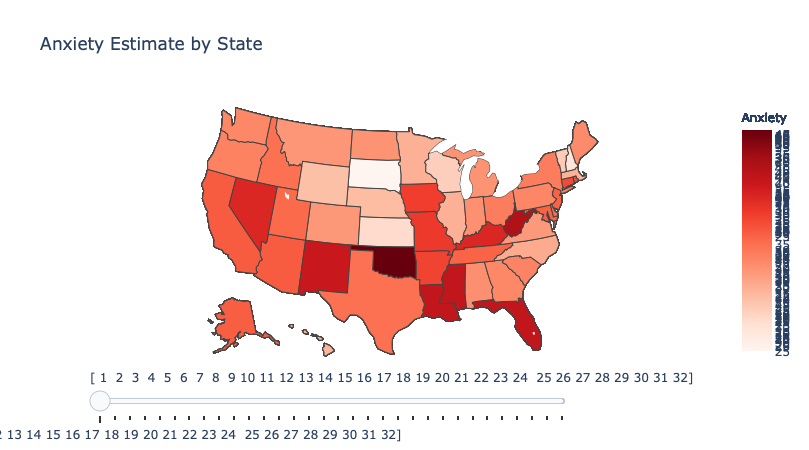

In [21]:
#Creating Choropleth Map for Anxiety by State

data_slider = []
for i in stateDF['Time Period Label'].unique():
    df_segmented = stateAF[stateAF['Time Period Label'] == i]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)
    
    tempName = str(df_segmented['Time Period Label'])
    tempName = tempName[4:-1138]
    tempName = tempName.strip()
    tempName = tempName.replace(" ", "")
    
    data_each_period = dict(type = 'choropleth',
                           locations = AB['State'],
                           z = df_segmented['Value'].astype(float),
                           locationmode = 'USA-states',
                           colorscale = 'reds',
                           colorbar = {'title':'Anxiety'},
                           name = tempName)
    
    
    data_slider.append(data_each_period)

steps = []
for i in range(len(data_slider)):
    step = dict(method = 'restyle',
               args = ['visible', [False] * len(data_slider)],
               label = str(stateDF['Time Period'].unique()))
    step['args'][1][i] = True,
    steps.append(step)
sliders = [dict(active = 0, pad = {"t": 5, "l": 10}, steps = steps, xanchor = 'left', len=0.77,
               visible = True)]

layout = dict(title = "Anxiety Estimate by State",
              geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
                        sliders=sliders)
               

fig = dict(data = data_slider, layout = layout)

#save and display
#pio.write_image(fig, 'anxiety_map.svg', format='svg')
pio.write_html(fig, 'anxiety_map.html', 
            auto_play=True, include_plotlyjs=True, 
            include_mathjax=False, post_script=None, full_html=False, 
            animation_opts=None, default_width='100%', default_height='100%', validate=True)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



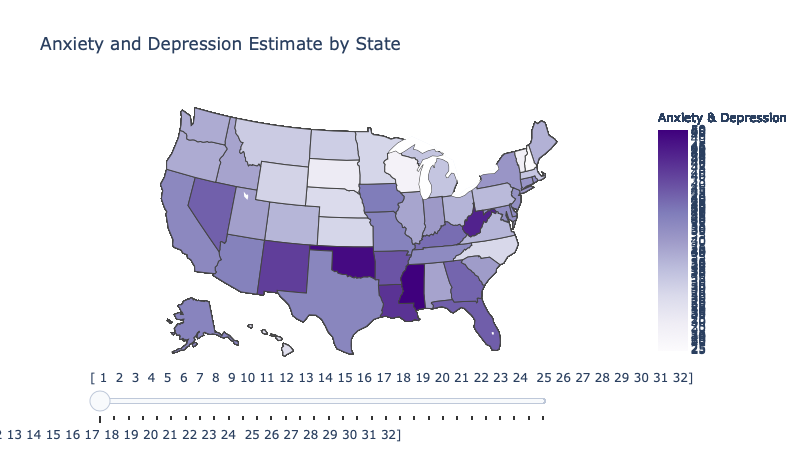

In [22]:
#Creating Choropleth Map for Both Anxiety and Depression by State

data_slider = []
for i in stateBF['Time Period Label'].unique():
    df_segmented = stateBF[stateBF['Time Period Label'] == i]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)
    
    tempName = str(df_segmented['Time Period Label'])
    tempName = tempName[4:-1138]
    tempName = tempName.strip()
    tempName = tempName.replace(" ", "")
    
    data_each_period = dict(type = 'choropleth',
                           locations = AB['State'],
                           z = df_segmented['Value'].astype(float),
                           locationmode = 'USA-states',
                           colorscale = 'purples',
                           colorbar = {'title':'Anxiety & Depression'},
                           name = tempName)
    
    
    data_slider.append(data_each_period)

steps = []
for i in range(len(data_slider)):
    step = dict(method = 'restyle',
               args = ['visible', [False] * len(data_slider)],
               label = str(stateDF['Time Period'].unique()))
    step['args'][1][i] = True,
    steps.append(step)
sliders = [dict(active = 0, pad = {"t": 5, "l": 10}, steps = steps, xanchor = 'left', len=0.85,
               visible = True)]

layout = dict(title = "Anxiety and Depression Estimate by State",
              geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
                        sliders=sliders)
               

fig = dict(data = data_slider, layout = layout)

#save and display
#pio.write_image(fig, 'both_map.svg', format='svg')
pio.write_html(fig, 'both_map.html', 
            auto_play=True, include_plotlyjs=True, 
            include_mathjax=False, post_script=None, full_html=False, 
            animation_opts=None, default_width='100%', default_height='100%', validate=True)
iplot(fig)

# THANK YOU FOR READING